In [1]:

import numpy as np
from sklearn.decom`position import NMF
from IPython.display import Image


# Algebra and neurons.

    Models for neurons.

    Matrix factorization.

    Intro to LDA.

## Models for neurons

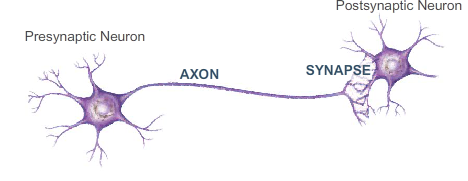

In [2]:

Image("neurons.png")

After a presynaptic neuron is exited,  it generates a signal, which travels on the Axon until it reaches a sypanpse, then that signal arrives to another neuron.

    -synapses are either excitatory or ihnibitory. 
    -for a neuron to be activated, the number of excitatory signals - the number of inhibitory signals should be bigger than a threshold.
    


We translate that into math using vectors and matrices:


    -presynaptic neurons are called 'hidden variables', postsynaptic neurons are called 
    'visible variables'.
    
    -neurons shot a quantizied signal, we will work with integrer coefficients.
    
    -every 'hidden variable' is connected to all 'visible variables', we will work with vectors of fixed dimension.
    
    -a synapsis may touch several times the same neuron, which leads to multiplication of signal.

We make synapse as large as axons.

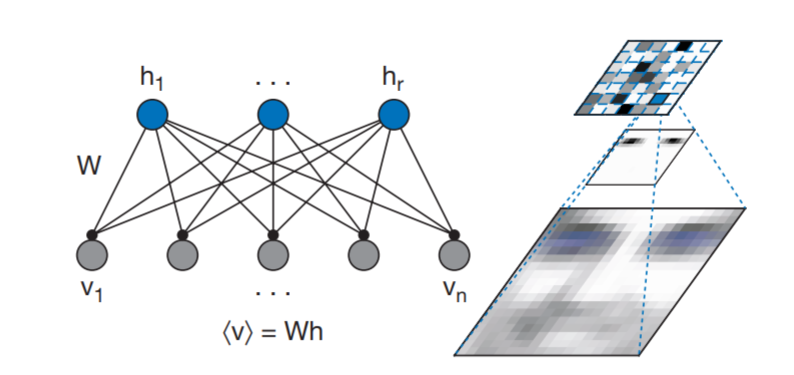

In [3]:
Image("posw.png")

Given the matrix $V,$ find matrices $W$ and $H$ so that $V=WH$ and $W, H$ have non negative coefficients.

    'Synapses are either excitatory or ihnibitory, but do not change sign. Futhermore, the non-negativity of the hidden and visible variables corresponds to the physiological fact that the firing rates of neurons cannot be negative,'

## Non negative matriz factorization

Given a matrix $V$ find $W,H$ so that:
$$V \sim WH$$
$W, H$ with non negative entries.



We look for the maximum of the objective funcion:

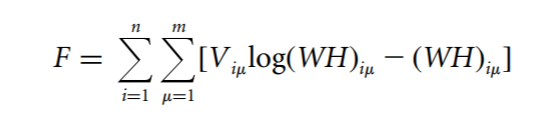

In [4]:
Image("objnmf.png")

The linkelihood of generating  $V$ from the basis W and encoding H.

### Semantic analysis of text documents.

It is useful to think of each feature (column vector) in the features matrix $W$ as a document archetype comprising a set of words where each word's cell value defines the word's rank in the feature: The higher a word's cell value the higher the word's rank in the feature. A column in the coefficients matrix $H$ represents an original document with a cell value defining the document's rank for a feature. We can now reconstruct a document (column vector) from our input matrix by a linear combination of our features (column vectors in $W$) where each feature is weighted by the feature's cell value from the document's column in $H$.

#### Example:

Assume we have 3 documents, we preprocess with tf-idf, so we give small scores to words that show on every document, and to words that show only once on their document. We select the 5 words with higher score and obtain the following matrix.

In [5]:
V = np.array([[0, 10, 0], [0, 0,2], [0, 0,8], [5, 0,2], [5, 0,0]])
model = NMF(n_components=1, init='random', random_state=0, max_iter=2000)
W = model.fit_transform(V)

H = model.components_

print('V=\n',V)


V=
 [[ 0 10  0]
 [ 0  0  2]
 [ 0  0  8]
 [ 5  0  2]
 [ 5  0  0]]


Then the factorization process give us:

In [6]:
print('W =\n',W.astype(int), '\n  H = \n ', H.astype(int))


W =
 [[2]
 [0]
 [0]
 [0]
 [0]] 
  H = 
  [[0 3 0]]


But this approximation is not deep enought.

In [7]:
print('WH=\n',W.astype(int)@H.astype(int))

WH=
 [[0 6 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


<font color =blue>$WH$ columns are linearly dependent</font>, we need more layers to obtain a better approximation.

In [8]:
V = np.array([[0, 10, 0], [0, 0,2], [0, 0,8], [5, 0,2], [5, 0,0], [7, 7,7]])
model = NMF(n_components=2, init='random', random_state=0, max_iter=2000)
W = model.fit_transform(V)

H = model.components_

print('V=\n',V)
W = model.fit_transform(V)
H = model.components_
print('W =\n',W.astype(int), '\n  H = \n ', H.astype(int))
print('WH=\n',W.astype(int)@H.astype(int))


V=
 [[ 0 10  0]
 [ 0  0  2]
 [ 0  0  8]
 [ 5  0  2]
 [ 5  0  0]
 [ 7  7  7]]
W =
 [[0 1]
 [0 0]
 [2 0]
 [1 0]
 [1 0]
 [3 1]] 
  H = 
  [[1 0 2]
 [0 6 0]]
WH=
 [[0 6 0]
 [0 0 0]
 [2 0 4]
 [1 0 2]
 [1 0 2]
 [3 6 6]]


$H$  gives the cluster indicator, i.e., if $\mathbf {H} _{kj}>0$ , that fact indicates input data $ v_{j}$  belongs to $ k^{th}$ cluster. Here we are dealing with clusters of words, that we consider as the topic of the text.

#### Example. 
Let's consider the following sentences.

'You can cut all the flowers but you cannot keep Spring from coming.'

'Seek not the paths of the ancients, Seek that which the ancients sought.'

'Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.'
 
'Test sentence, seek flowers.'


We preprocess with tf-idf, so we give small scores to words that show on every document, and to words that show only once on their document. 

We can believe that the 3 words with higher score will be 'flowers', 'buffalo' and 'seek'.

(Code found online)

In [10]:
data_samples=['You can cut all the flowers but you cannot keep Spring from coming.',
'Seek not the paths of the ancients, Seek that which the ancients sought.',
'Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.',
'Test sentence, seek flowers.']

In [11]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 4
n_features = 4
n_components = 4
n_top_words = 2


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Loading dataset...
Extracting tf-idf features for NMF...
done in 0.000s.
Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=4 and n_features=4...
done in 0.030s.

Topics in NMF model (Frobenius norm):
Topic #0: ancients seek
Topic #1: buffalo seek
Topic #2: seek flowers
Topic #3: flowers seek



Remember that the sentences were the following ones:

    'You can cut all the flowers but you cannot keep Spring from coming.'
    'Seek not the paths of the ancients, Seek that which the ancients sought.'
    'Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.'
    'Test sentence, seek flowers.'

The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. Source: http://qwone.com/~jason/20Newsgroups/

In [12]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]
print("done in %0.3fs." % (time() - t0))
print("Data example: \n",data_samples[0][:100], '...\n')

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=1,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Loading dataset...
done in 3.409s.
Data example: 
 Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement tha ...

Extracting tf-idf features for NMF...
done in 0.658s.
Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 3.301s.

Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: people like just don time really say make know think way did right ve said want work years things good
Topic #1: windows thanks using help need use hi work know looking software does mail used pc video running available info appreciated
Topic #2: god does true read know question say says believe subject religion point people jesus mean mind fact matter christian christians
Topic #3: thanks know mail interested like want new edu send does bike just email thing reply list don price heard let
Topic #4: time new year 10 sale old 20 offer good 15 usually 16 30 ve weeks 11 g

On the paper: Learning the parts of objects by non-negative matrix factorization they did the following.

Given a vocabulary with $n = 15 276$ words, and $k=30 991$ documents, $V_{ik}$ the number of times the $i$-word in the dictionary appears on the $k$ document. 

By using $V_{nm}=W_{n\, 200} H_{200\, m}$.

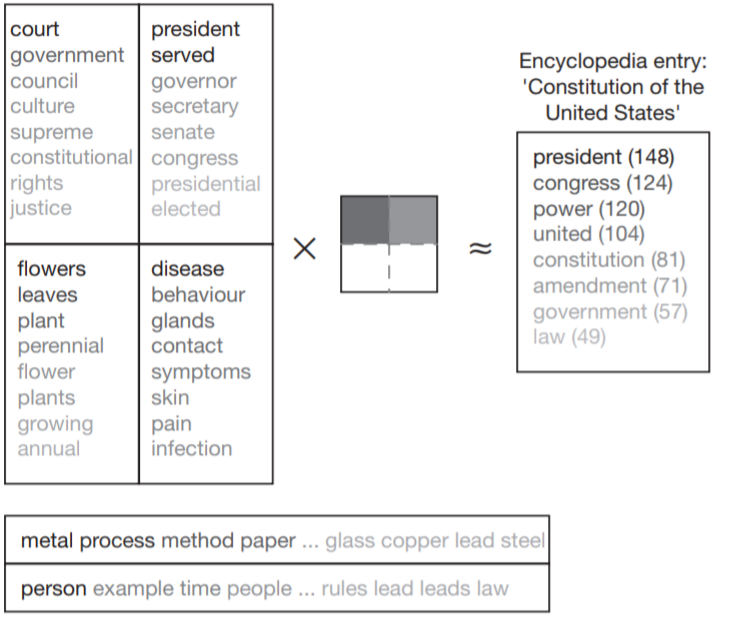

In [13]:
Image("paper.png")

    In addition to grouping semantically related words together into semantic features, the algorithm uses context to differentiate between multiple meanings of the same word. For example, the word ‘lead’ appears with high frequency in two semantic features shown in Fig. 4: it occurs with ‘metal’, ‘copper’ and ‘steel’ in one, whereas it appears with ‘person’, ‘rules’ and ‘law’ in the other. This demonstrates that NMF can deal with the polysemy of ‘lead’ by disambiguating two of its meanings in the corpus of documents.

# Generalizations:

## Non Negative Tensor Factorization

You can think of tensors as higher dimensional matrices.


$$ rv\otimes  \cdots\otimes v_i\otimes\cdots \otimes v_r=v\otimes \cdots\otimes rv_i\otimes \cdots\otimes v_r $$



$$v\otimes  \cdots\otimes v_i+w_i\otimes\cdots\otimes v_r=v\otimes  \cdots\otimes v_i\otimes\cdots\cdots\otimes v_r+v\otimes  \cdots\otimes w_i\otimes\cdots \otimes v_r$$

$v_i\in R^i, r\in R$

Definition: a simple tensor is a tensor that can be written as $$v\otimes  \cdots\otimes v_i\otimes\cdots\cdots\otimes v_r.$$

Example:

$(1,2)\otimes (1,1,1)$ is a simple tensor.

$(1,2)\otimes (1,1,1)+(0,2)\otimes (1,1,1)=(1,4)\otimes (1,1,1)$ is a simple tensor.

$(1,2)\otimes (1,1,1)+(1,0)\otimes (1,1,0)$ is not a simple tensor.




Definition.The rank of a tensor T is the minimum number of simple tensors that sum to T. 

### EHR
Electronic Health Records contain information of $n$-patients in tables with $m$-columns of diagnosis and $r$-rows of medications.

So, the entry $A_{nmr}$ is one if the $n^{th}$-patient was diagnosed with the $m^{th}$ sickness and was given the $r^{th}$-medication. Most entries are zero, so this is a sparse matrix.

How can we factor tensors and use the previous ideas?

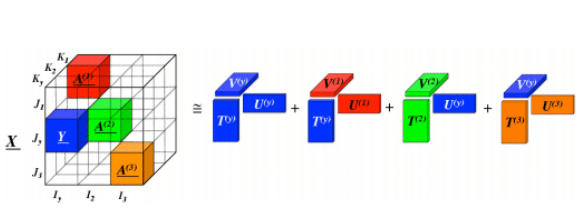

In [14]:

Image("tensord.png")

### Tensor decomposition into rank one tensor shows concurring diagnosis and medications, this process is known as phenotyping.

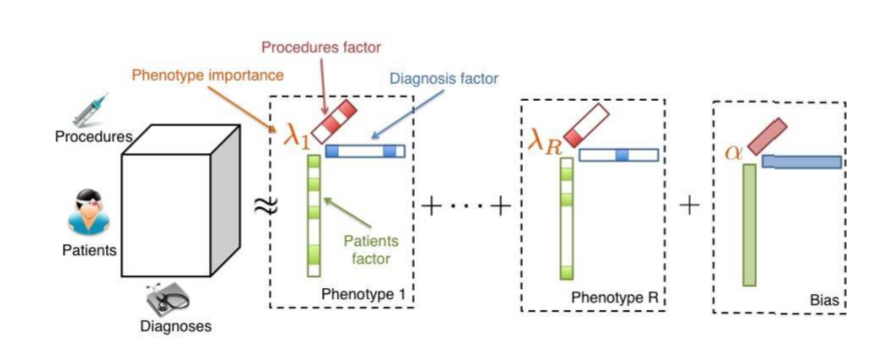

In [15]:
Image("tensor.png")

Phenomapping for Novel Classification of Heart Failure
With Preserved Ejection Fraction
Sanjiv J. Shah, MD (2016)

The study of phenotypes using machine learning lead to the discovering of 3 distinct groups of Hearth Failure  with preserved Ejection Fractions (HFpEF),  those groups "differed markedly in clinical characteristics, cardiac structure/function, invasive hemodynamics, and outcomes".

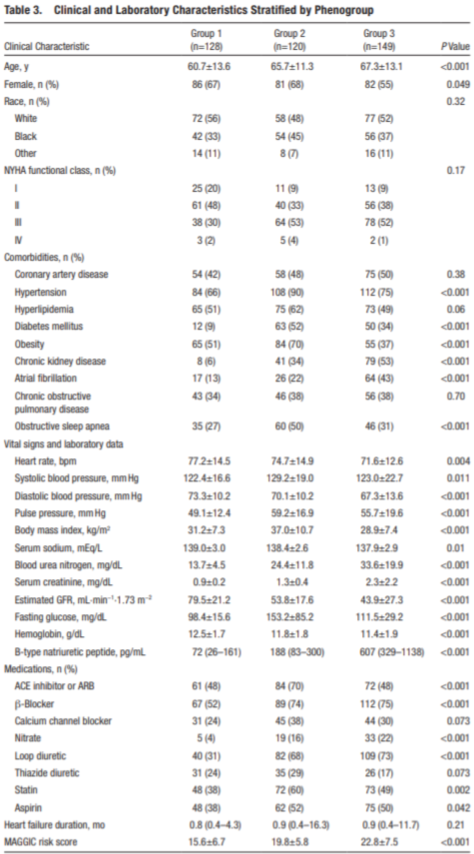

In [16]:
Image("phenotypes.png")

"improved classification and categorization
of patients with HFpEF and may lead to the development
of novel targeted therapies..."

  The algorithm  produces two terms, a bias term that includes the common relationships among the population, and a tensor decomposition of the phenotypes. 

### LDA
#### Topic analysis.

Assume that you have to write a notebook on LDA. Let's focus on the key words that you want to use.

You probably want around $200$ words.

It should containt the following topics: <font color=blue>20% of literature</font>, <font color=red>20% about NLP</font>, <font color= gray>40% about preparing a presentation</font>, and <font color=green>20% about math</font>. 

The first word is probably going to be related to the topic:

 <font color= gray>preparing a presentation</font>

Here we have a list of words on this topic and how important they are for the topic:

 <font color= gray>{ write:10%, notebook:9%, latex:9%, powerpoint:12%, projector:10%, practice:20%, auditorium:5%, images:10%, time:5%, creative:10%   }</font>

Assume that we selected the word  <font color= gray> write</font>.

Let's continue this way and create 7 words: 

<font color=gray>write 
    
<font color=gray>notebook 
    
<font color=red>LDA 

<font color=blue>words 

<font color=green>probably
 
<font color=blue>words 
    
<font color=blue>topics
    

By adding some auxiliary words we get:


Assume that you have to <font color=gray>write</font> a <font color=gray>notebook</font> on <font color=red>LDA</font>.
Let's focus on the key <font color=blue>words</font> that you want to use.

You <font color=green>probably</font> want around $200$ <font color=blue>words</font>.

It should containt the following <font color=blue>topics</font>.

In LDA we assume that the documents are actually generated in this way:

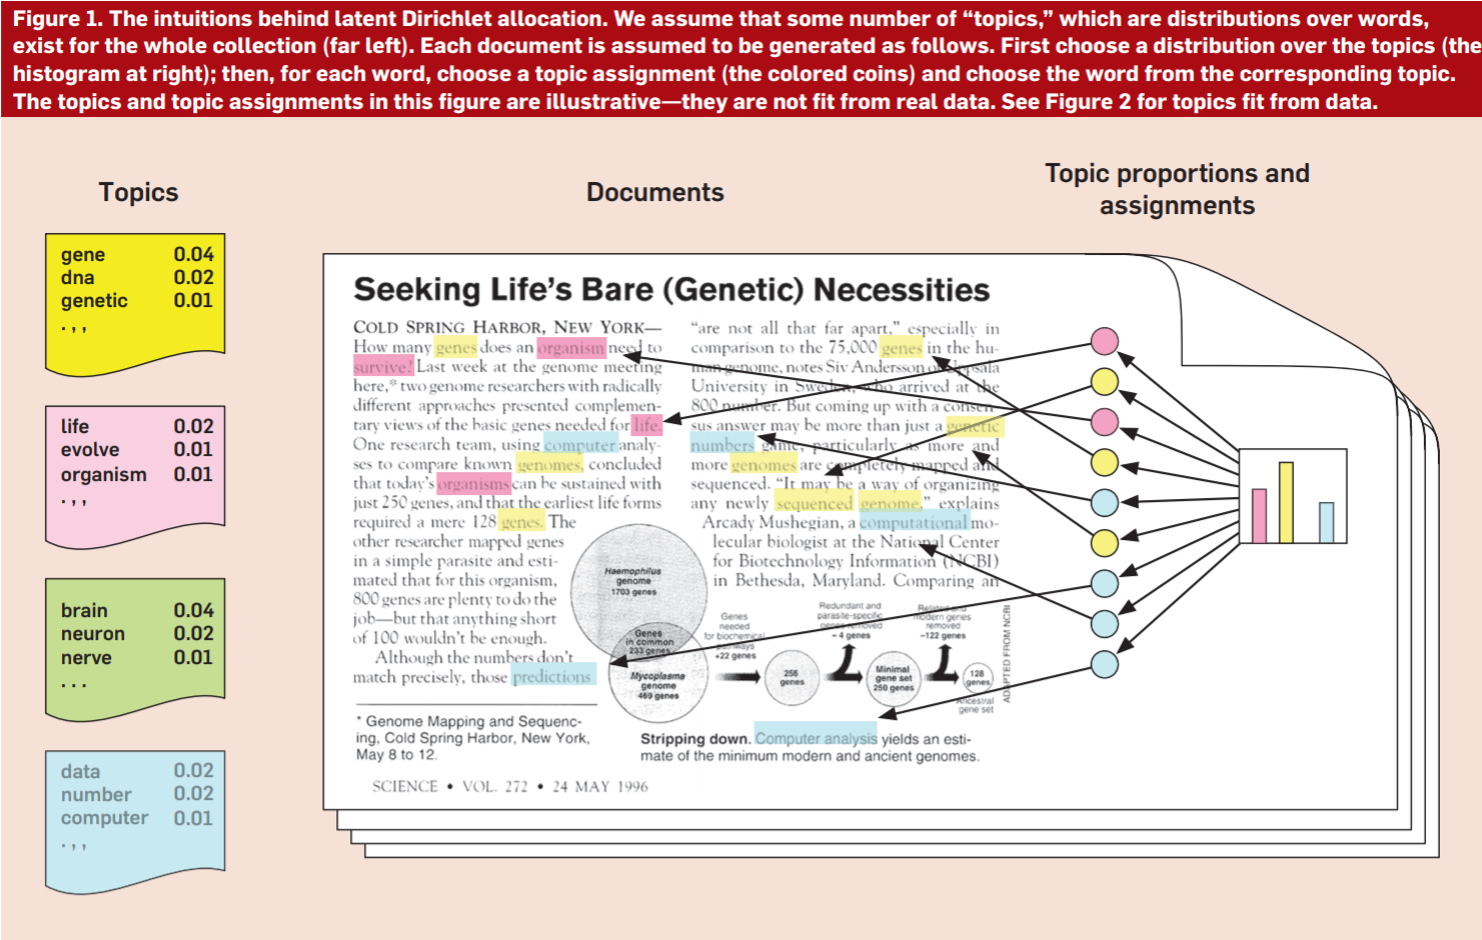

In [17]:
Image('bigpic.png')

#### Notation:

Let $w_{d,n}$ be the $n$th word in document $d$.

Let $\beta_{1:k}$ be the topics, where $\beta_k$ is a distribution over the vocabulary.

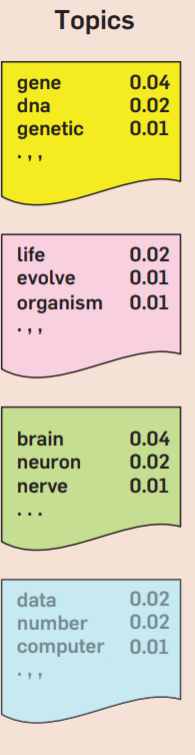

In [18]:
Image('betta.png')

Let $\theta_{d,k}$ be the topic proportion for topic $k$ on document $d$. 

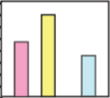

In [19]:
Image('theta.png')

The topic assigment for the $n$ word on the $d$ document are $z_{d,n}.$

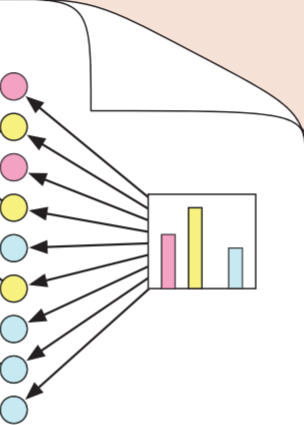

In [20]:
Image('z.png')

The generative process for LDA corresponds to the following joint distribution:

$P(\beta_{1,k},\theta_{1:D},z_{1:D},w_{1:D} )=\prod_{i=1}^kp(\beta_{i})\prod_{d=1}^Dp(\theta_{d})\left(\prod_{n=1}^N p(z_{d,n}|\theta_d) p(w_{d,n}|\beta_{1:k},z_{d,n})\right)$

It helps to look at the graphical model.

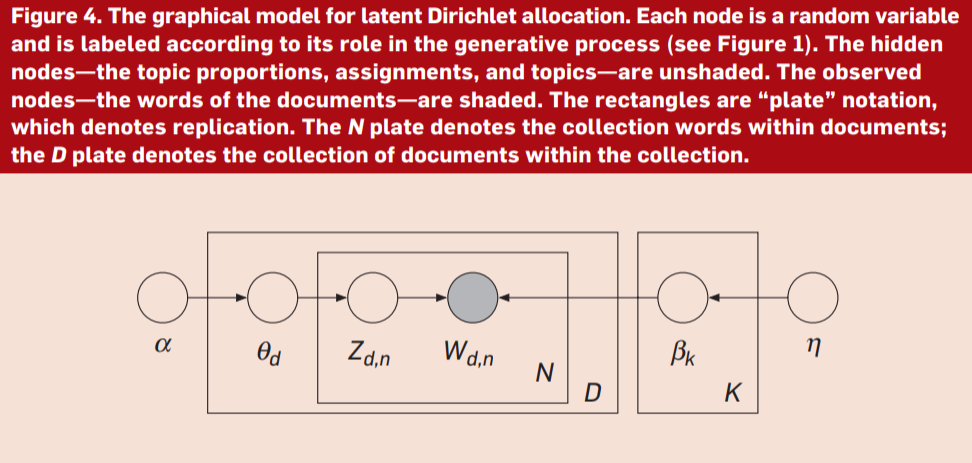

In [21]:
Image('graphicalmodel.png')

We assume that the topic $z_{d,n}$ depends on the per-document topic proportions $\theta_d,$ and the word depends on the topic assigment $z_{d,n}$ and all of the topics $\beta_{1:k}$.

Now we reverse the process to find the main topics of each sentence. 

    'You can cut all the flowers but you cannot keep Spring from coming.',
    'Seek not the paths of the ancients, Seek that which the ancients sought.',
    'Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.',
    'Test sentence, seek flowers.

    'flowers.',
    'Seek Seek sought.',
    'Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.',
    'seek flowers.

We will randomly assign values to all those parameters and correct them step by step.


Go throught each document, and randomly assign each word in the document to a topic.



    Select random values for the distribution of topics per document and to the distribution of words per topic.
        
        
        


<font color=blue>flowers
    
    
<font color=red>Seek <font color= gray>Seek 
    
<font color=blue>Buffalo buffalo <font color= gray>Buffalo buffalo  buffalo <font color=blue>buffalo Buffalo <font color=green> buffalo

<font color=green>seek <font color=red>flowers


For each document $D$, for each topic $t,$ calculate the following:    
$p(topic \,t|document \,d)$ words in document $d$ assigned to topic $t$/words in document $d$.
       
$p(word \,w|topic \,t)$ times the word $w$ is assigned to topic $t$ in all documents/words in $t$.

### Document 1.

$p(topic \,blue|document \,1)=1$
    

$p(flower |topic \,blue)=1/5$




### Document 2.

$p(topic \,red|document \,2)=1/2$

$p(topic \,gray|document \,2)=1/2$
    
$p(Seek |topic \,Red)=1/2$

$p(Seek |topic \,Gray)=1/4$



<font color=blue>flowers
    
    
<font color=red>Seek <font color= gray>Seek 
    
<font color=blue>Buffalo buffalo <font color= gray>Buffalo buffalo  buffalo <font color=blue>buffalo Buffalo <font color=green> buffalo

<font color=green>seek <font color=red>flowers

### Document 3.

$p(topic \,blue|document \,3)=1/2$

$p(topic \,gray|document \,3)=3/8$

$p(topic \,green|document \,3)=1/8$

$p(buffalo |topic \,blue)=4/5$

$p(buffalo |topic \,gray)=3/4$

$p(buffalo |topic \,green)=1/2$




### Document 4.

$p(topic \,green|document \,4)=1/2$

$p(topic \,red|document \,4)=1/2$
    
$p(seek |topic \,green)=1/2$

$p(flower |topic \,red)=1/2$




       
We now select a new topic for $w$ where we choose topic $t$ with probability $$p(word\, w|topic\, t)*p(topic \, t |document \,d)$$ 

we select the topic more likely to generate $w$ in document $d$.
        
 

$p(topic \,blue|document \,3)*p(buffalo |topic \,blue)=1/2*4/5=2/5.$

$p(topic \,gray|document \,3)*p(buffalo |topic \,gray)=3/8*3/4=9/32$

$p(topic \,green|document \,3)*p(buffalo |topic \,green)=1/8*1/2=1/16$



Buffalo is more likely to be blue in document 3, which is something expected.

We repeat this process for every word in the document. 

### Details

#### Non Negative Matrix Factorization:

Learning the parts of objects by non-negative matrix factorization,Daniel D. Lee & H. Sebastian Seung.

#### Tensor factorization:

Non-negative Multiple Tensor Factorization, Koh Takeuchi

ON TENSORS, SPARSITY, AND NONNEGATIVE factorization, Eric Chi (2012).


Marble: High-throughput Phenotyping from Electronic Health Records via Sparse Nonnegative Tensor Factorization, Joyce Ho, KDD 2014

#### LDA:
Probabilistic Topic Models https://dl.acm.org/citation.cfm?doid=2133806.2133826


Introduction to LDA http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/

